###Import libraries and and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/workspaces/group-project-ruby/input/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

###Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Display duplicate rows

display(df.duplicated().sum())
display(df[df.duplicated(keep=False)].sort_values(by='MonthlyCharges'))

np.int64(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#There are no duplicate rows, hence the is no droping needed

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
unique_values_summary = {
    'Column': [],
    'Total Unique Values': [],
    'Unique Values': []
}
pd.set_option('display.max_colwidth', None)

for column in df.columns:
    unique_vals = df[column].unique()
    unique_values_summary['Column'].append(column)
    unique_values_summary['Unique Values'].append(unique_vals)
    unique_values_summary['Total Unique Values'].append(len(unique_vals))

display(pd.DataFrame(unique_values_summary))

pd.reset_option('display.max_colwidth')

,Column,Total Unique Values,Unique Values
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC, 7892-POOKP, 6388-TABGU, 9763-GRSKD, 7469-LKBCI, 8091-TTVAX, 0280-XJGEX, 5129-JLPIS, 3655-SNQYZ, 8191-XWSZG, 9959-WOFKT, 4190-MFLUW, 4183-MYFRB, 8779-QRDMV, 1680-VDCWW, 1066-JKSGK, 3638-WEABW, 6322-HRPFA, 6865-JZNKO, 6467-CHFZW, 8665-UTDHZ, 5248-YGIJN, 8773-HHUOZ, 3841-NFECX, 4929-XIHVW, 6827-IEAUQ, 7310-EGVHZ, 3413-BMNZE, 6234-RAAPL, 6047-YHPVI, 6572-ADKRS, 5380-WJKOV, 8168-UQWWF, 8865-TNMNX, 9489-DEDVP, 9867-JCZSP, 4671-VJLCL, 4080-IIARD, 3714-NTNFO, 5948-UJZLF, 7760-OYPDY, 7639-LIAYI, 2954-PIBKO, 8012-SOUDQ, 9420-LOJKX, 6575-SUVOI, 7495-OOKFY, 4667-QONEA, 1658-BYGOY, 8769-KKTPH, 5067-XJQFU, 3957-SQXML, 5954-BDFSG, 0434-CSFON, 1215-FIGMP, 0526-SXDJP, 0557-ASKVU, 5698-BQJOH, 5122-CYFXA, 8627-ZYGSZ, 3410-YOQBQ, 3170-NMYVV, 7410-OIEDU, 2273-QCKXA, 0731-EBJQB, 1891-QRQSA, 8028-PNXHQ, 5630-AHZIL, 2673-CXQEU, 6416-JNVRK, 5590-ZSKRV, 0191-ZHSKZ, 3887-PBQAO, 5919-TMRGD, 8108-UXRQN, 9191-MYQKX, 9919-YLNNG, 0318-ZOPWS, 4445-ZJNMU, 4808-YNLEU, 1862-QRWPE, 2796-NNUFI, 3016-KSVCP, 4767-HZZHQ, 2424-WVHPL, 7233-PAHHL, 6067-NGCEU, 9848-JQJTX, 8637-XJIVR, 9803-FTJCG, 0278-YXOOG, 3212-KXOCR, 4598-XLKNJ, ...]"
1,gender,2,"[Female, Male]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]"
6,PhoneService,2,"[No, Yes]"
7,MultipleLines,3,"[No phone service, No, Yes]"
8,InternetService,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,3,"[No, Yes, No internet service]"


In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

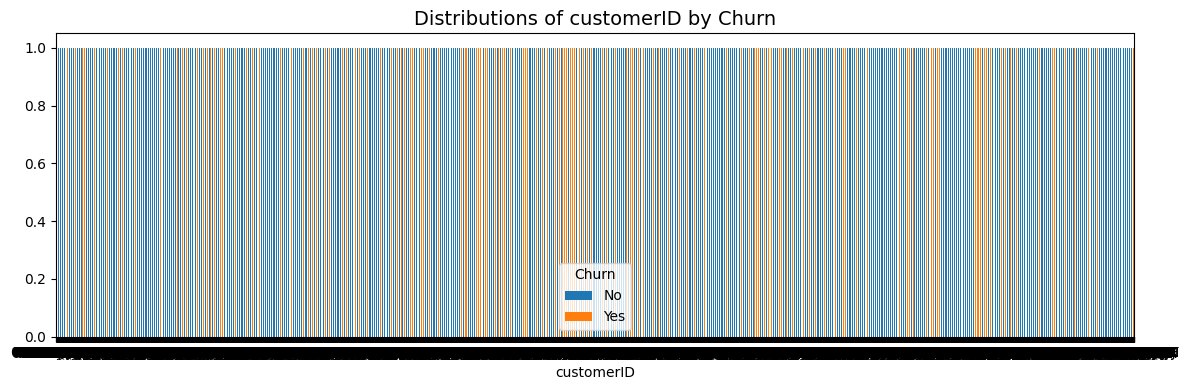

Percentage distribution of customerID by Churn:


Churn,No,Yes
customerID,,
0002-ORFBO,0.014198,0.000000
0003-MKNFE,0.014198,0.000000
0004-TLHLJ,0.000000,0.014198
0011-IGKFF,0.000000,0.014198
0013-EXCHZ,0.000000,0.014198
...,...,...
9987-LUTYD,0.014198,0.000000
9992-RRAMN,0.000000,0.014198
9992-UJOEL,0.014198,0.000000



------------------------------------------------------------------------------------------------------------------------------------------------------



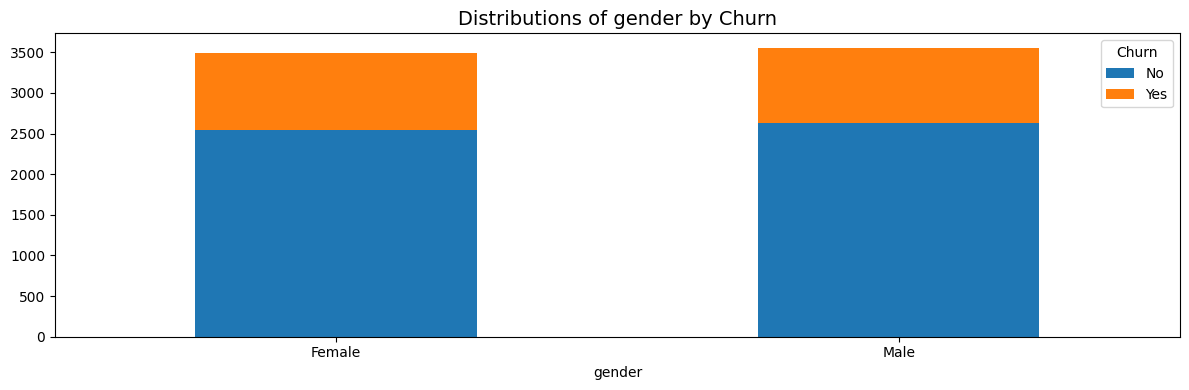

Percentage distribution of gender by Churn:


Churn,No,Yes
gender,,
Female,36.191964,13.332387
Male,37.271049,13.204600



------------------------------------------------------------------------------------------------------------------------------------------------------



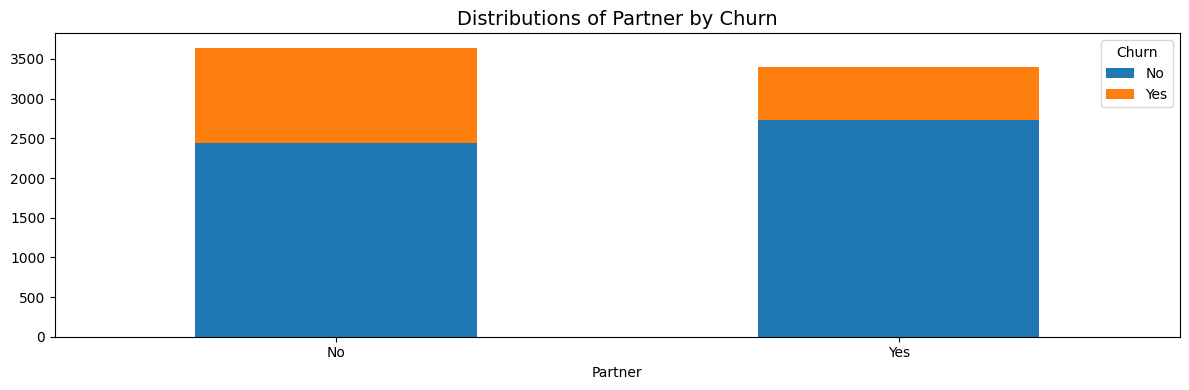

Percentage distribution of Partner by Churn:


Churn,No,Yes
Partner,,
No,34.658526,17.038194
Yes,38.804487,9.498793



------------------------------------------------------------------------------------------------------------------------------------------------------



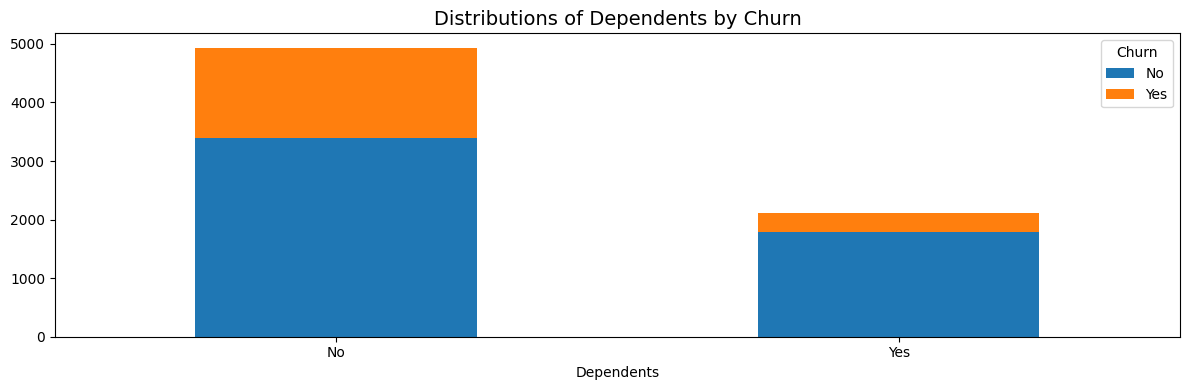

Percentage distribution of Dependents by Churn:


Churn,No,Yes
Dependents,,
No,48.132898,21.908278
Yes,25.330115,4.628709



------------------------------------------------------------------------------------------------------------------------------------------------------



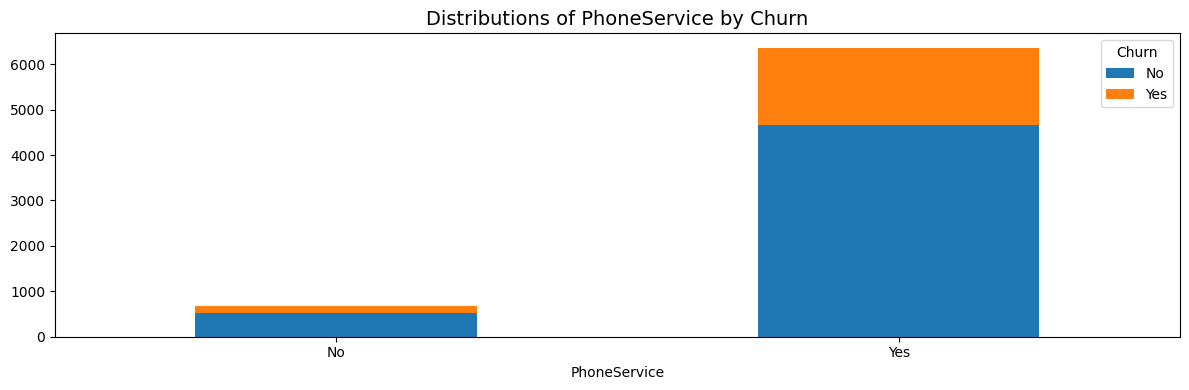

Percentage distribution of PhoneService by Churn:


Churn,No,Yes
PhoneService,,
No,7.269629,2.413744
Yes,66.193384,24.123243



------------------------------------------------------------------------------------------------------------------------------------------------------



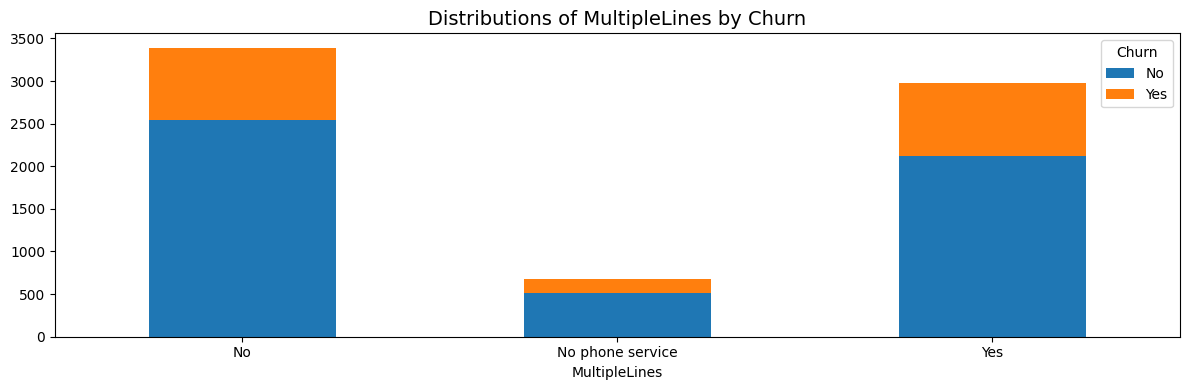

Percentage distribution of MultipleLines by Churn:


Churn,No,Yes
MultipleLines,,
No,36.078376,12.054522
No phone service,7.269629,2.413744
Yes,30.115008,12.068721



------------------------------------------------------------------------------------------------------------------------------------------------------



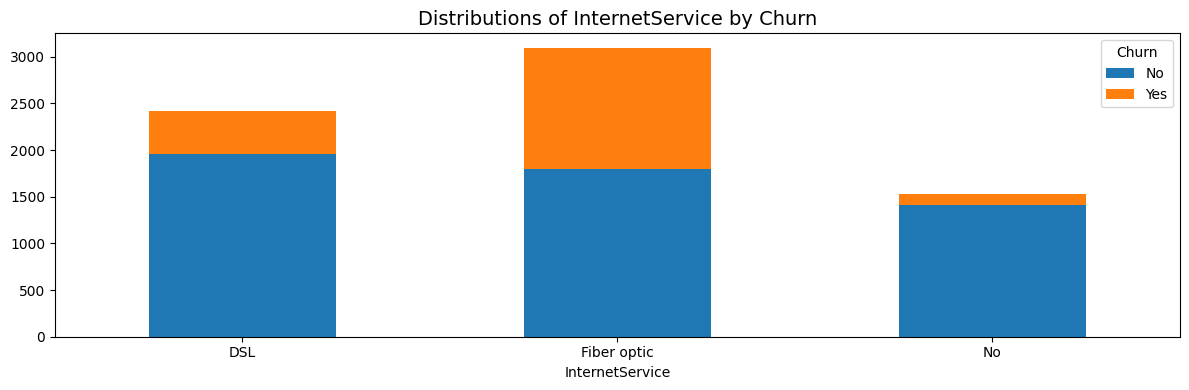

Percentage distribution of InternetService by Churn:


Churn,No,Yes
InternetService,,
DSL,27.857447,6.517109
Fiber optic,25.543092,18.415448
No,20.062473,1.604430



------------------------------------------------------------------------------------------------------------------------------------------------------



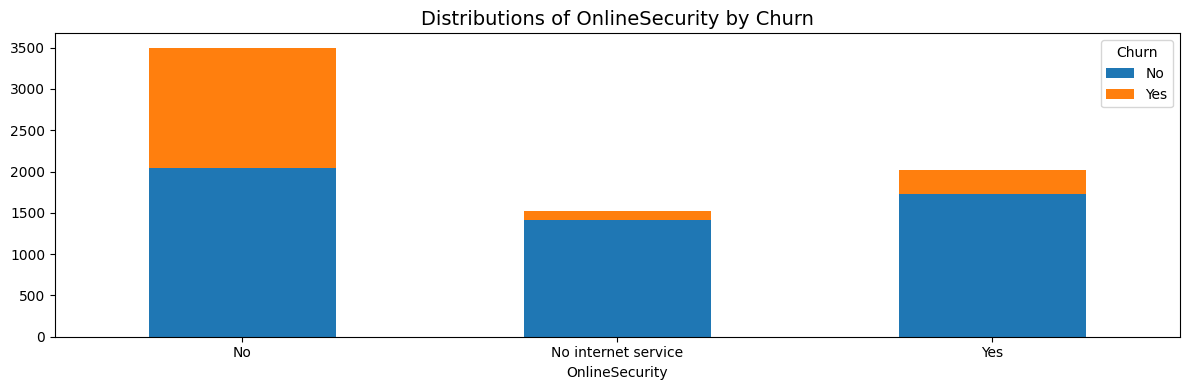

Percentage distribution of OnlineSecurity by Churn:


Churn,No,Yes
OnlineSecurity,,
No,28.922334,20.744001
No internet service,20.062473,1.604430
Yes,24.478205,4.188556



------------------------------------------------------------------------------------------------------------------------------------------------------



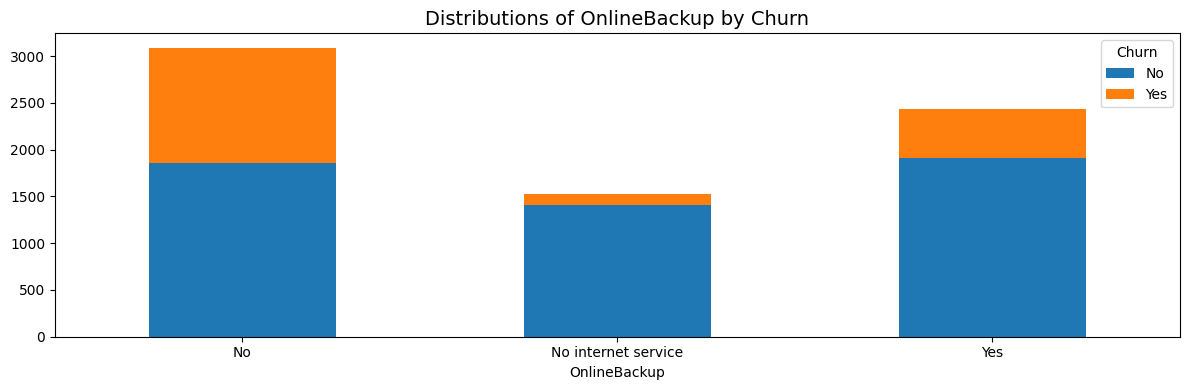

Percentage distribution of OnlineBackup by Churn:


Churn,No,Yes
OnlineBackup,,
No,26.338208,17.506744
No internet service,20.062473,1.604430
Yes,27.062331,7.425813



------------------------------------------------------------------------------------------------------------------------------------------------------



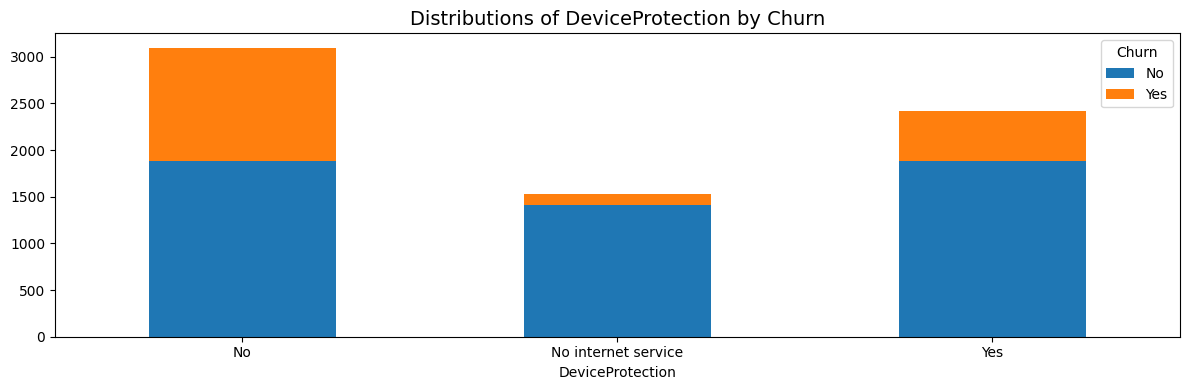

Percentage distribution of DeviceProtection by Churn:


Churn,No,Yes
DeviceProtection,,
No,26.749965,17.194377
No internet service,20.062473,1.604430
Yes,26.650575,7.738180



------------------------------------------------------------------------------------------------------------------------------------------------------



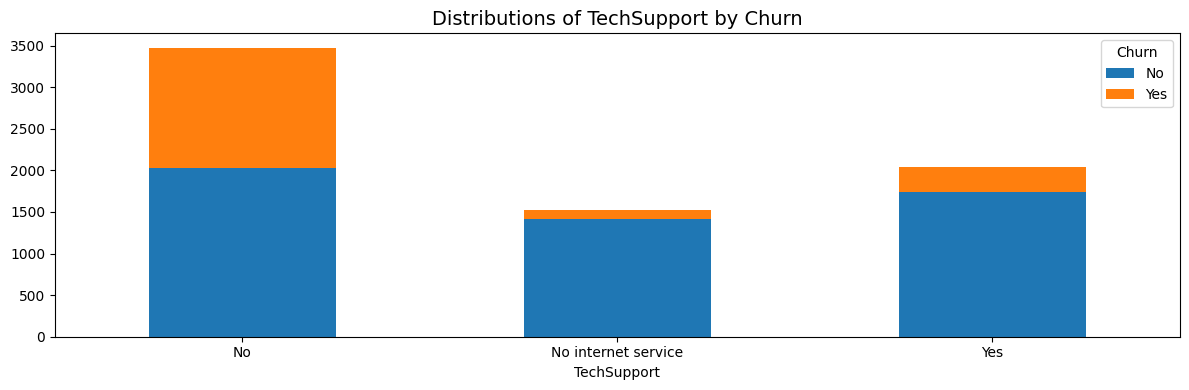

Percentage distribution of TechSupport by Churn:


Churn,No,Yes
TechSupport,,
No,28.780349,20.531024
No internet service,20.062473,1.604430
Yes,24.620190,4.401533



------------------------------------------------------------------------------------------------------------------------------------------------------



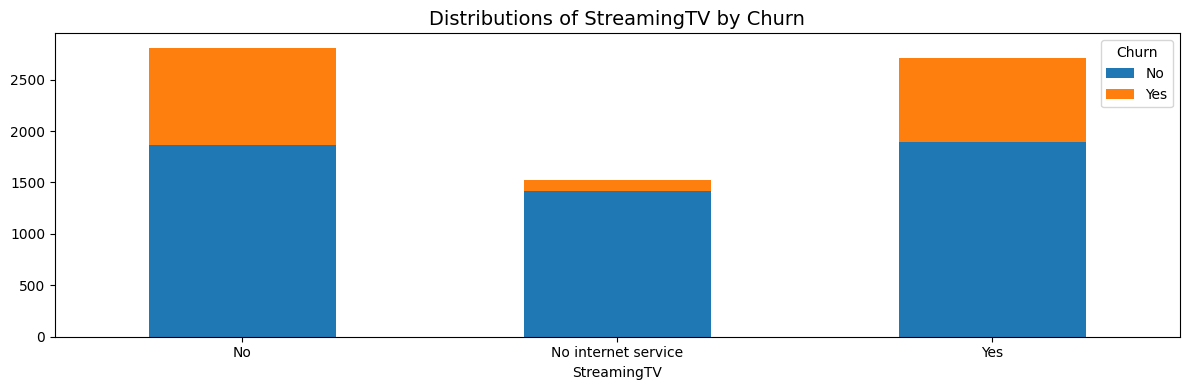

Percentage distribution of StreamingTV by Churn:


Churn,No,Yes
StreamingTV,,
No,26.522789,13.374982
No internet service,20.062473,1.604430
Yes,26.877751,11.557575



------------------------------------------------------------------------------------------------------------------------------------------------------



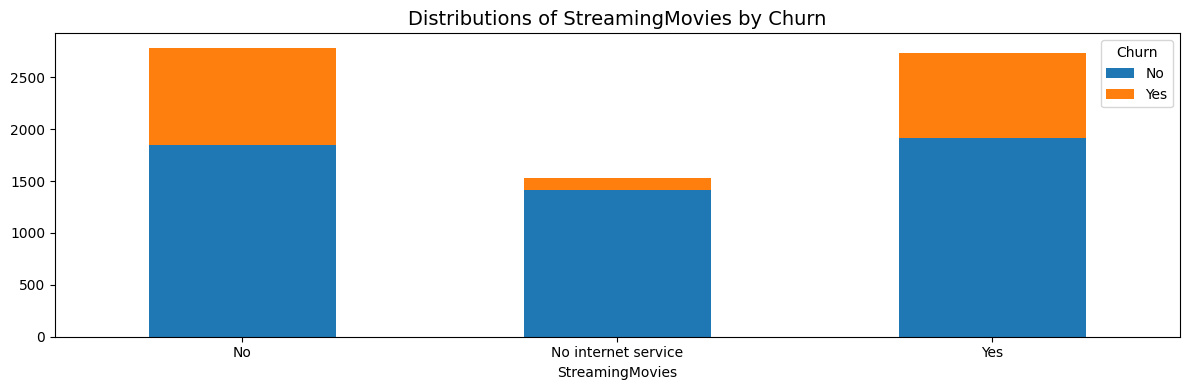

Percentage distribution of StreamingMovies by Churn:


Churn,No,Yes
StreamingMovies,,
No,26.224620,13.318188
No internet service,20.062473,1.604430
Yes,27.175919,11.614369



------------------------------------------------------------------------------------------------------------------------------------------------------



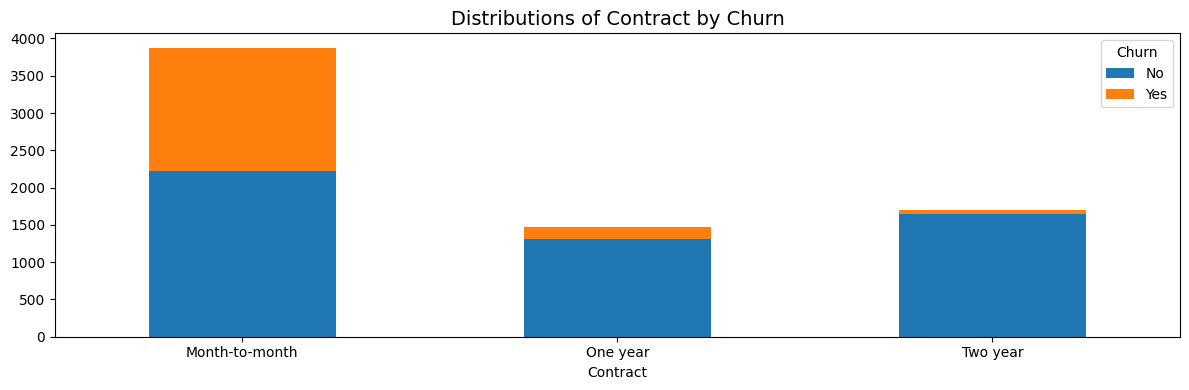

Percentage distribution of Contract by Churn:


Churn,No,Yes
Contract,,
Month-to-month,31.520659,23.498509
One year,18.557433,2.356950
Two year,23.384921,0.681528



------------------------------------------------------------------------------------------------------------------------------------------------------



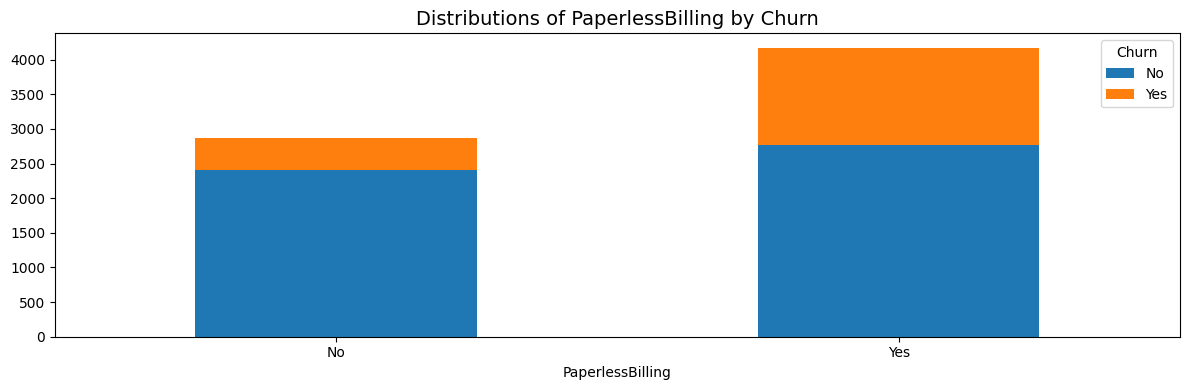

Percentage distribution of PaperlessBilling by Churn:


Churn,No,Yes
PaperlessBilling,,
No,34.118983,6.659094
Yes,39.344030,19.877893



------------------------------------------------------------------------------------------------------------------------------------------------------



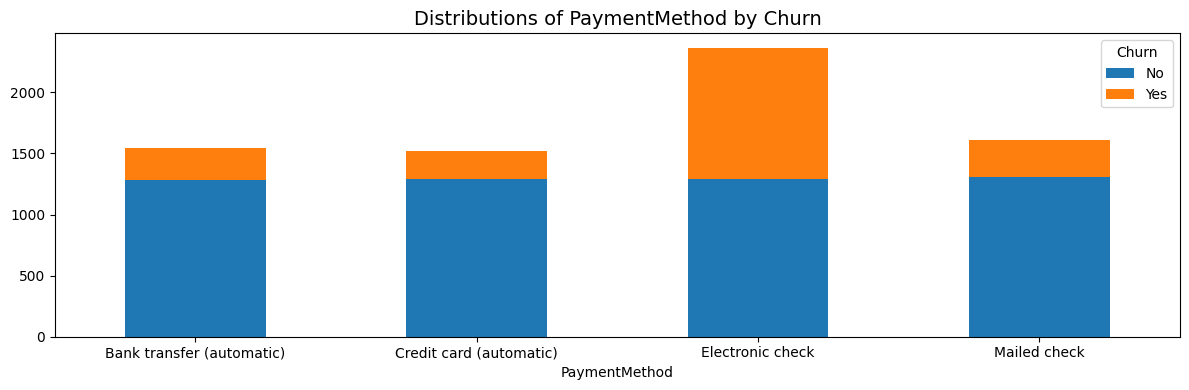

Percentage distribution of PaymentMethod by Churn:


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),18.259265,3.663212
Credit card (automatic),18.316058,3.294051
Electronic check,18.372852,15.206588
Mailed check,18.514837,4.373136



------------------------------------------------------------------------------------------------------------------------------------------------------



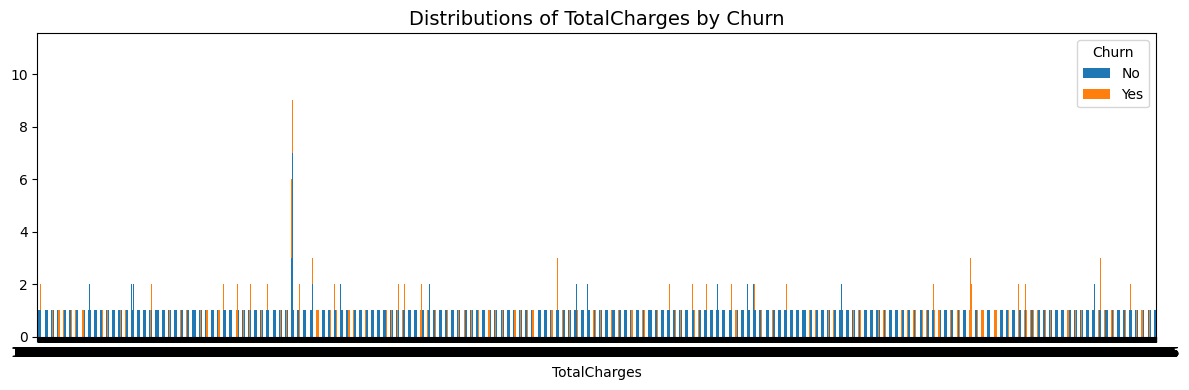

Percentage distribution of TotalCharges by Churn:


Churn,No,Yes
TotalCharges,,
,0.156183,0.000000
100.2,0.014198,0.000000
100.25,0.000000,0.014198
100.35,0.014198,0.000000
100.4,0.000000,0.014198
...,...,...
997.75,0.014198,0.000000
998.1,0.014198,0.000000
999.45,0.000000,0.014198



------------------------------------------------------------------------------------------------------------------------------------------------------



In [9]:
for col in df.select_dtypes(include='O'):
    if col == 'Churn':
        continue
    counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    percentage_counts = counts.div(df[col].count(), axis=0) * 100

    counts.plot(
        kind='bar', 
        stacked=True, 
        figsize=(12, 4), 
    )
    
    plt.title(f"Distributions of {col} by Churn", fontsize=14)
    plt.xticks(rotation=0)
    plt.legend(['No','Yes'],title="Churn", fontsize=10)
    plt.tight_layout()
    plt.show()

    print(f"Percentage distribution of {col} by Churn:")
    display(percentage_counts)
    print("\n" + "---"*50 + "\n")